<h1 style="font-size: 40px;font-family:'georgia'">Movie Recommendation System</h1>
<img src="https://www.freecodecamp.org/news/content/images/size/w1000/2023/11/movie-recommendation.png">

<a id="contents_tabel"></a>
<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #dedede; font-size:110%; text-align:left">
<h2 align="left"><font color='Black'>Table of Contents:</font></h2>

* [Import Libraries](#1)
* [Credits Dataset](#2)
* [Keywords Libraries](#3)
* [Movies Dataset](#4)
* [Collaborative Filtering](#5)
* [Popularity-Based Filtering](#6)
* [Content Based Filtering](#7)
* [Hybrid Based Filtering](#8)

<a id="1"></a>
# <p style="background-color:#E50914; font-family:georgia; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer

<a id="2"></a>
# <p style="background-color:#E50914; font-family:georgia; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Credits Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
credits = pd.read_csv("./Dataset/credits.csv")
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [3]:
credits['crew'][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

 <a id="training_basic"></a>
# <b><span style='color:#333'>Directors with most movies</span></b>


In [4]:
# Convert strings to lists of dictionaries
credits['crew'] = credits['crew'].apply(ast.literal_eval)

In [5]:
# Extract director's name
def extract_director(crew_list):
    for member in crew_list:
        if member['job'] == 'Director':
            return member['name']
    return None

# Create the director column
credits['director'] = credits['crew'].apply(extract_director)

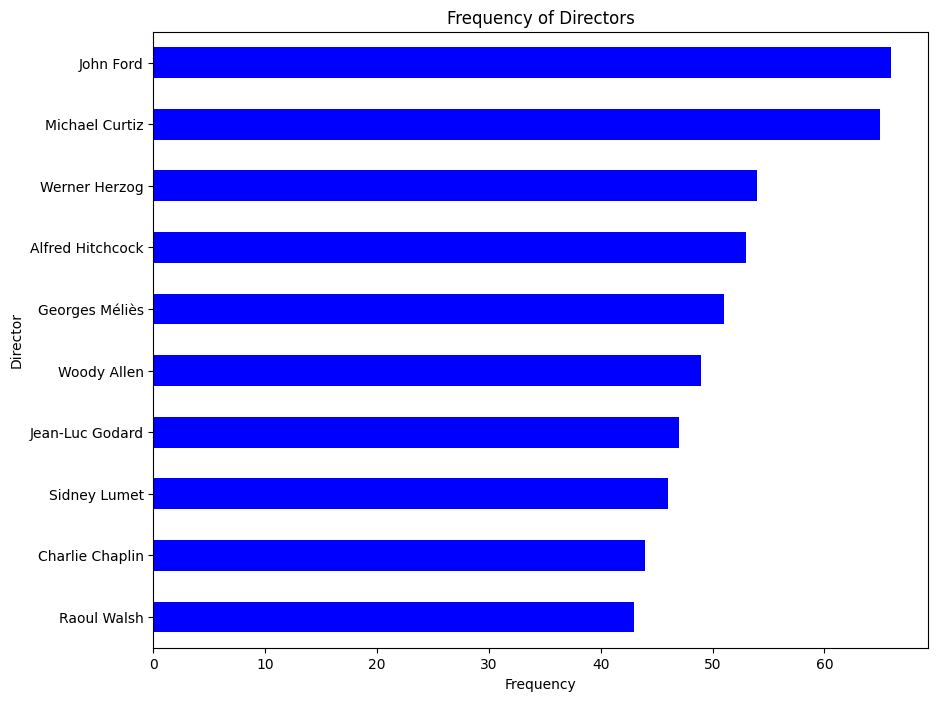

In [6]:
# Count the frequency of each director
director_counts = credits['director'].value_counts().sort_values(ascending=False).head(10)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))
director_counts.plot(kind='barh', color='blue')
plt.xlabel('Frequency')
plt.ylabel('Director')
plt.title('Frequency of Directors')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent directors at the top
plt.show()

<a id="3"></a>
# <p style="background-color:#E50914; font-family:georgia; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Keywords Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [7]:
keywords_df = pd.read_csv("./Dataset/keywords.csv")
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


## Most used Keywords

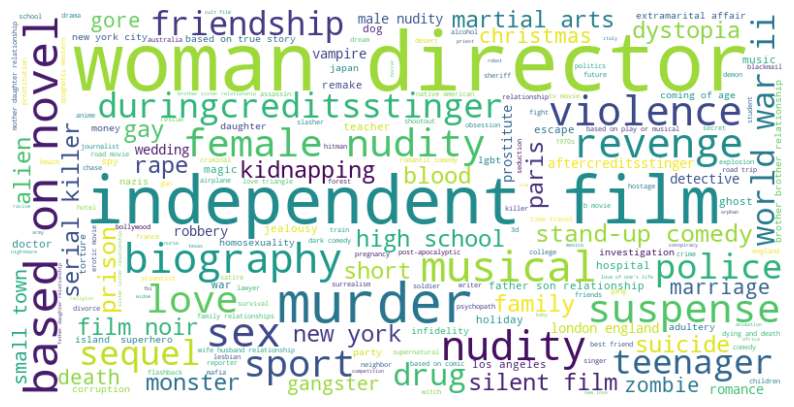

In [8]:
# Function to extract names from list of dictionaries
def extract_name(keywords_list_str):
    keywords_list = ast.literal_eval(keywords_list_str)
    names = [d['name'] for d in keywords_list]
    return names

# Apply function to extract names and create new column
keyword_names = keywords_df['keywords'].apply(extract_name)
# Explode the keyword list into separate rows
df_exploded = keyword_names.explode()

# Group by keyword and count occurrences
keyword_counts = df_exploded.value_counts()

# Convert keyword_counts to dictionary for WordCloud
keyword_counts_dict = keyword_counts.to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(keyword_counts_dict)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<a id="4"></a>
# <p style="background-color:#E50914; font-family:georgia; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Movies Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [9]:
movies = pd.read_csv("./Dataset/movies_metadata.csv",low_memory=False)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##  Highest rated movies by genre

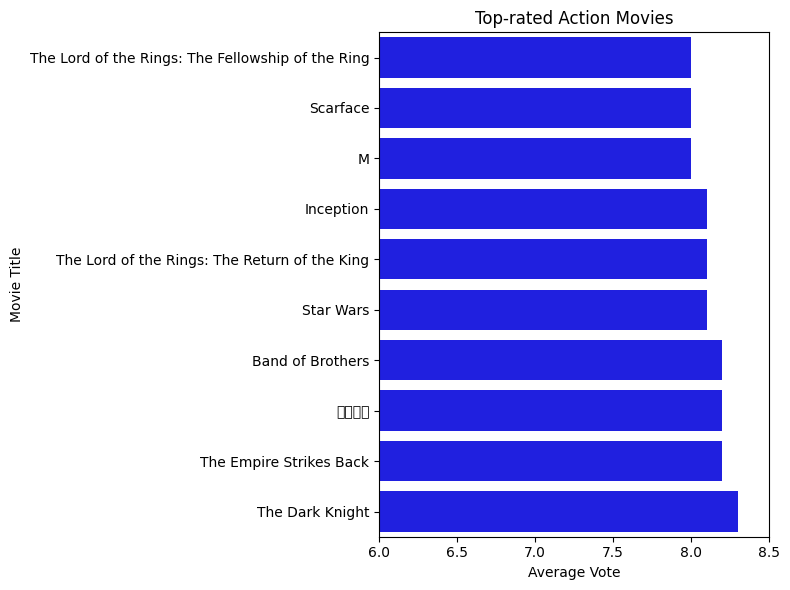

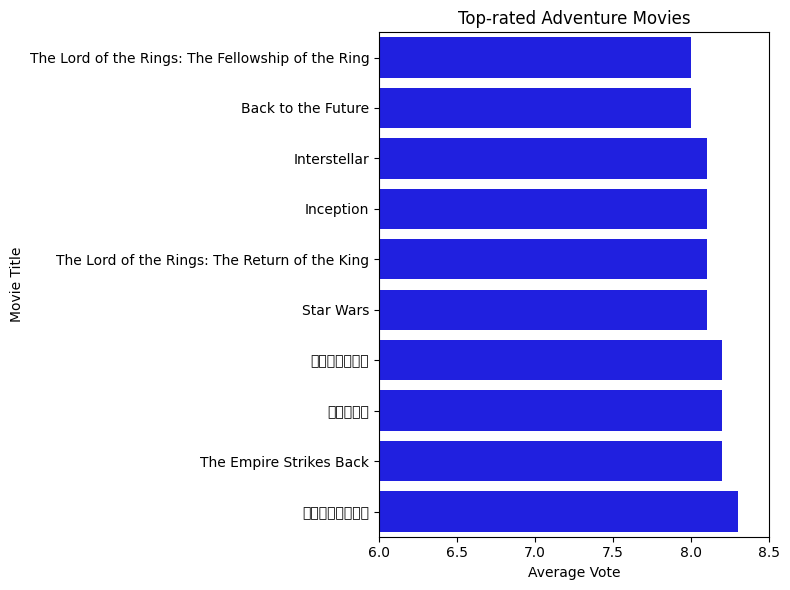

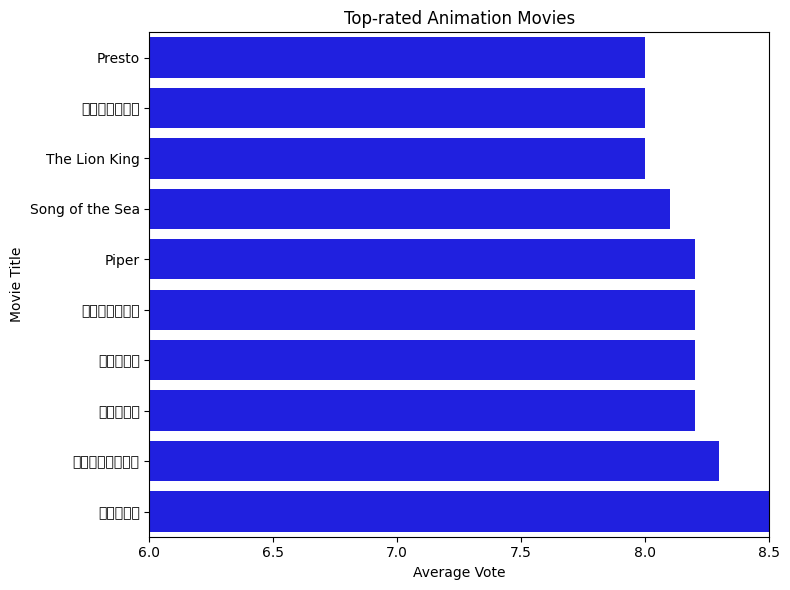

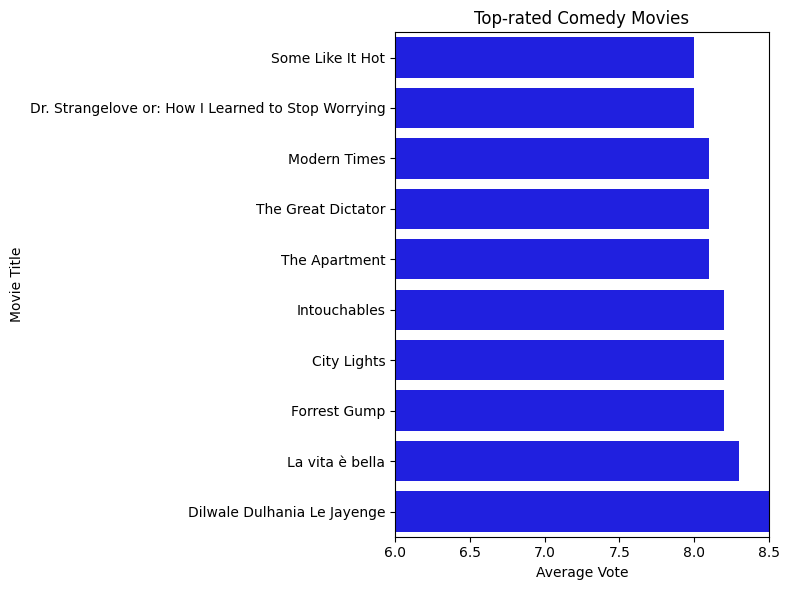

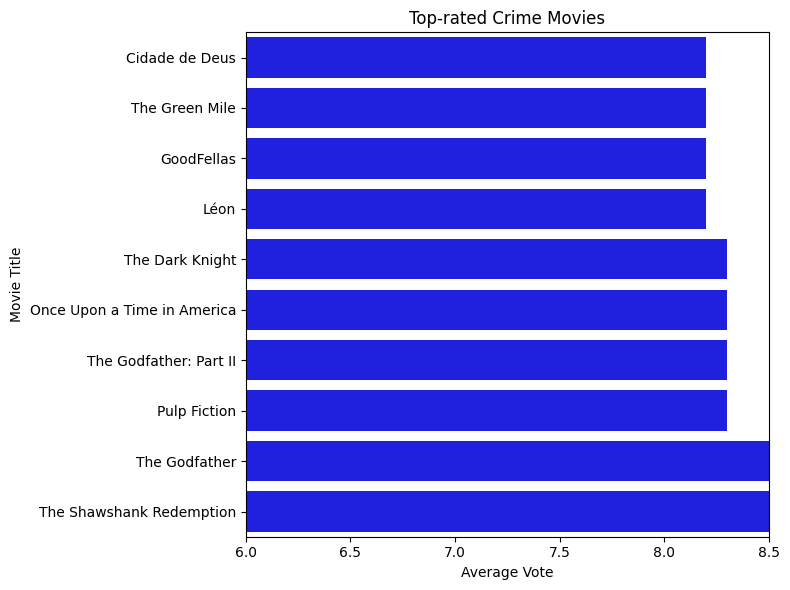

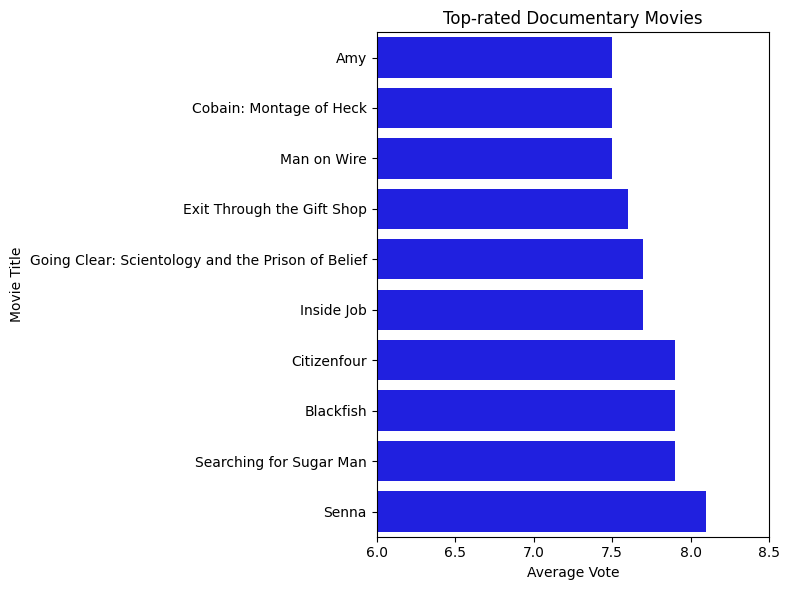

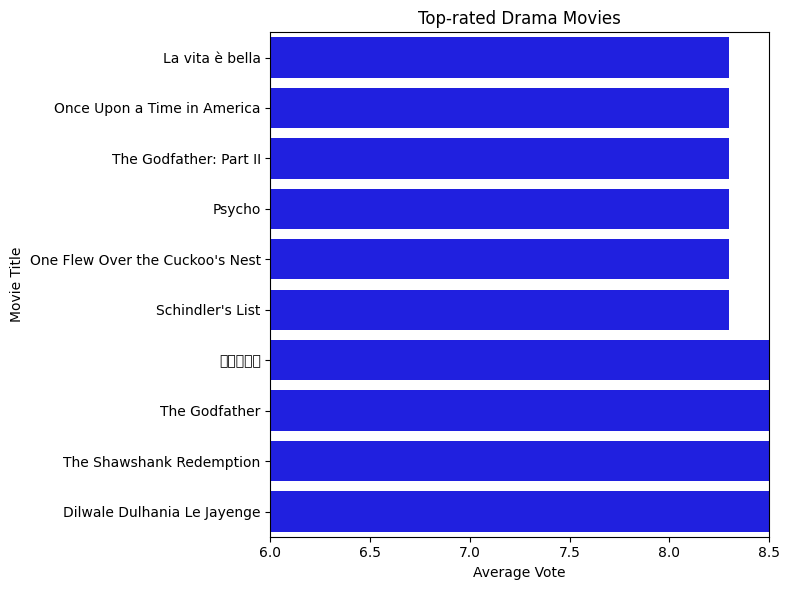

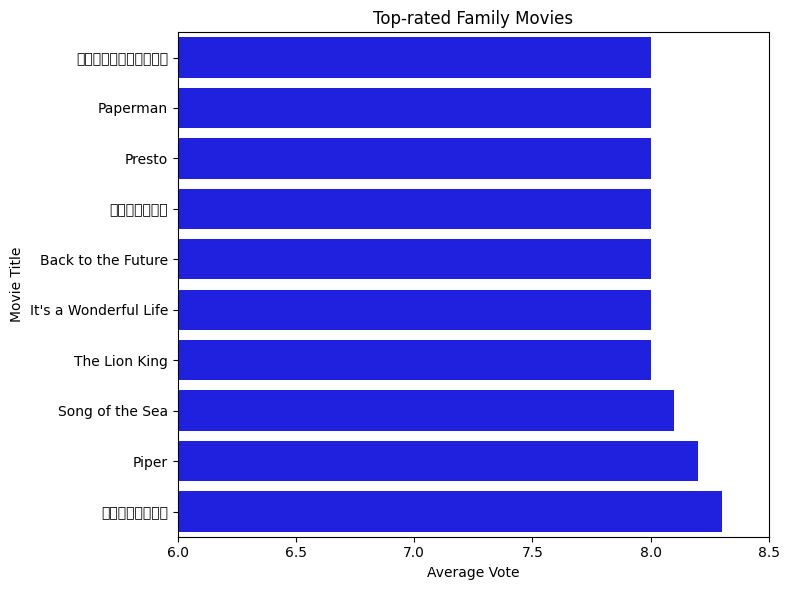

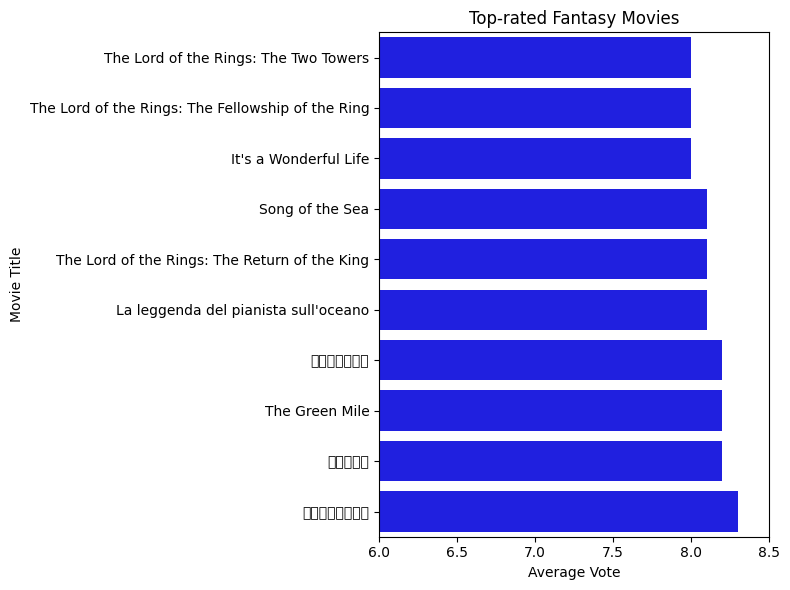

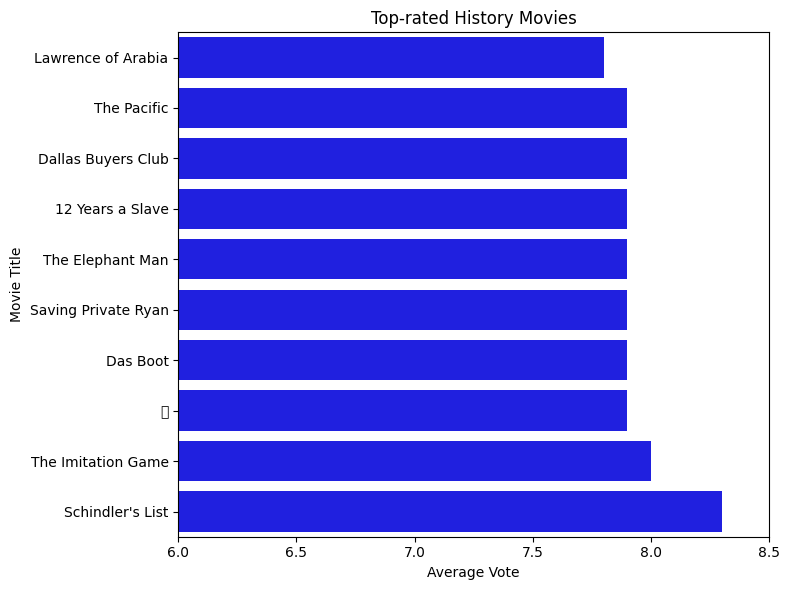

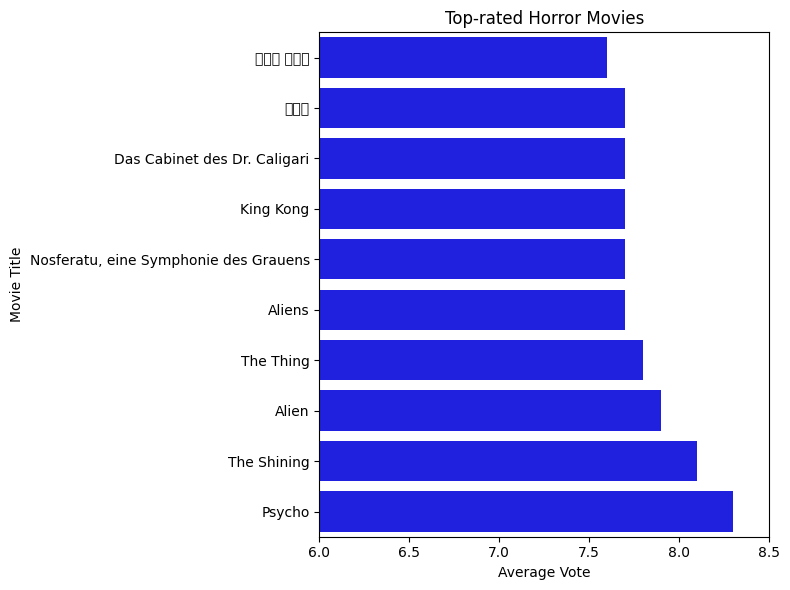

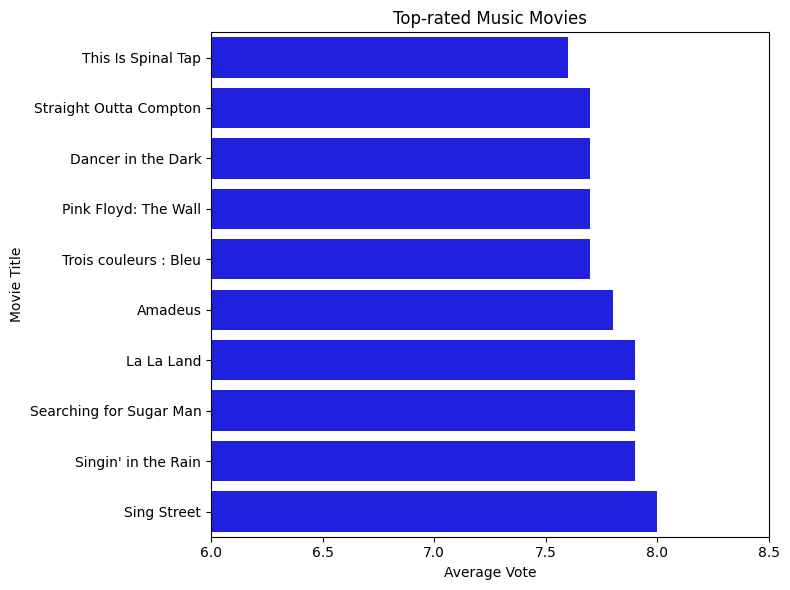

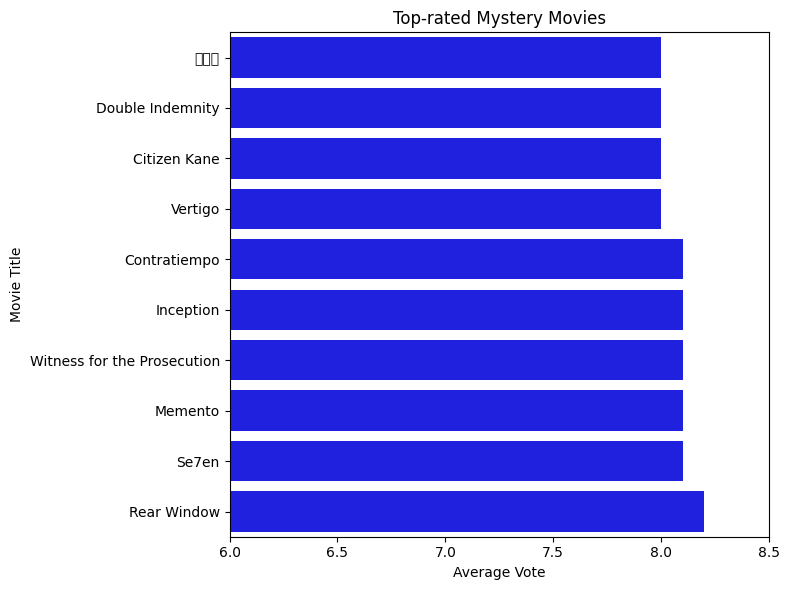

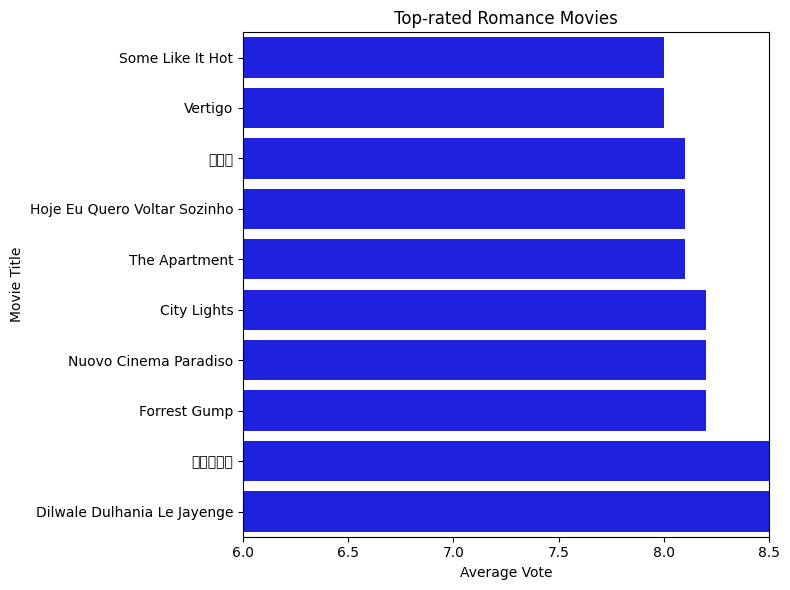

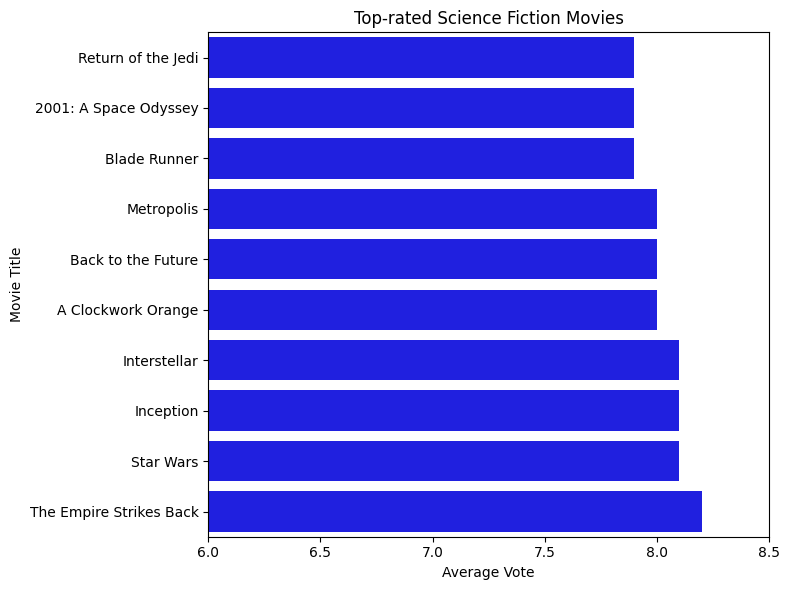

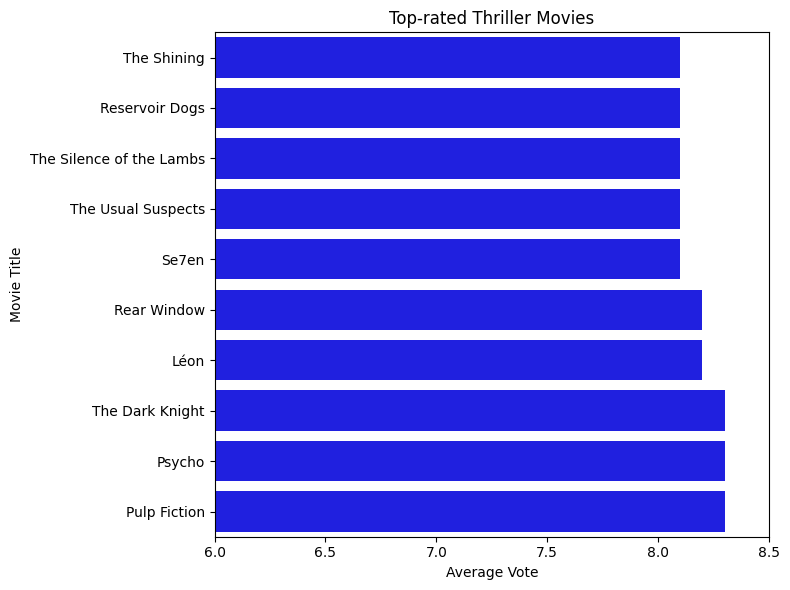

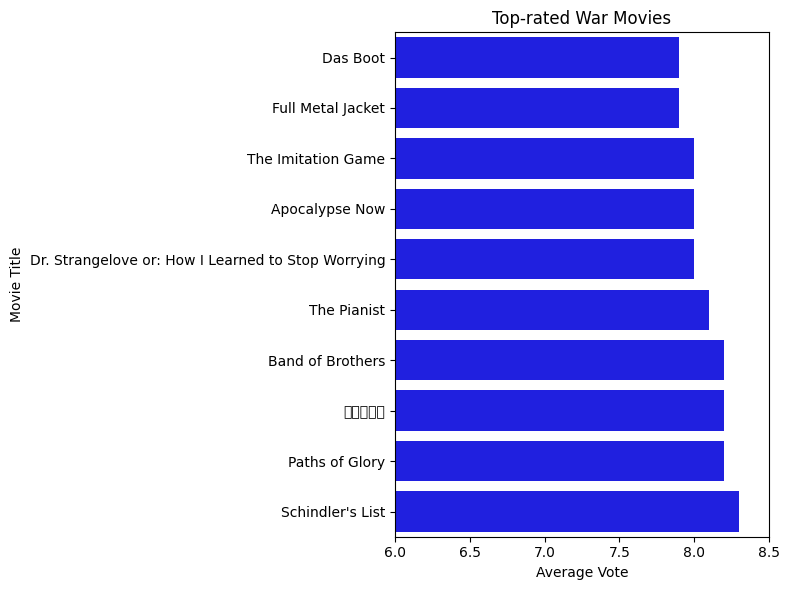

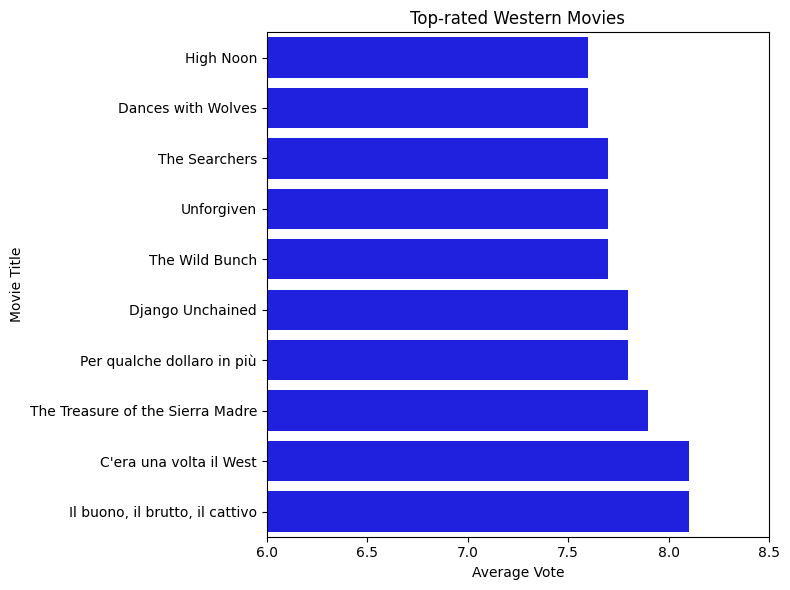

In [10]:
# Function to extract genre names from the 'genres' column
def extract_genre_names(genre_str):
    genre_list = ast.literal_eval(genre_str)
    return [genre['name'] for genre in genre_list]


# Filter movies with vote_count > 250
filtered_movies = movies[movies['vote_count'] > 250].copy()

# Apply the function to extract genre names
filtered_movies['genre_names'] = filtered_movies['genres'].apply(extract_genre_names)

# Explode the genre_names column
filtered_movies = filtered_movies.explode('genre_names')

# Drop rows with NA values in vote_average
filtered_movies.dropna(subset=['vote_average'], inplace=True)

# Truncate title to 50 characters
filtered_movies['title'] = filtered_movies['original_title'].str.slice(0, 50)

# Filter out genres "Foreign" and "TV Movie"
filtered_movies = filtered_movies[~filtered_movies['genre_names'].isin(['Foreign', 'TV Movie'])]

# Group by genre_names and create separate plots for each genre
for genre_name, genre_data in filtered_movies.groupby('genre_names'):

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=genre_data.nlargest(10, 'vote_average'), x='vote_average', y='title', color='blue')
    ax.set_xlabel('Average Vote')
    ax.set_ylabel('Movie Title')
    ax.set_title(f'Top-rated {genre_name} Movies')
    ax.set_xlim(6, 8.5)
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()


<a id="5"></a>
# <p style="background-color:#E50914; font-family:georgia; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Collaborative Filtering</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #dedede; font-size:110%; text-align:left">
Collaborative Filtering identifies patterns in user behavior and recommends movies based on the preferences of users with similar tastes. For this, we will utilize the [Surprise](http://surpriselib.com/) library, a Python scikit for building and analyzing recommender systems.

The specific modules used for collaborative filtering are:
- [Dataset](https://surprise.readthedocs.io/en/stable/dataset.html) from Surprise: A module to load a dataset.
- [Reader](https://surprise.readthedocs.io/en/stable/reader.html) from Surprise: A module to define the format of the input file.
- [SVD (Singular Value Decomposition)](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) from Surprise: A collaborative filtering algorithm based on matrix factorization.
- [model_selection](https://surprise.readthedocs.io/en/stable/model_selection.html) from Surprise: A module providing tools for model selection and evaluation.

In [11]:
ratings_small = pd.read_csv("./Dataset/ratings_small.csv")
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Create the dataset

In [12]:
# Importing Dataset and Reader classes from the Surprise library
from surprise import Dataset, Reader

In [13]:
# Creating a Reader instance with the rating scale defined as (1, 5)
reader = Reader(rating_scale=(1,5))

# Loading the dataset from the 'ratings' DataFrame using the specified Reader
dataset = Dataset.load_from_df(ratings_small[['userId','movieId','rating']],reader)
dataset

## Build the trainset

In [14]:
trainset = dataset.build_full_trainset()

## Model Building

In [15]:
from surprise import SVD

In [16]:
svd = SVD()

In [17]:
svd.fit(trainset)

## Model Prediction

In [18]:
movies[movies["id"] == "8844"][['title', 'id']]

,title,id
1,Jumanji,8844


### Let's check for movie "Jumanji"

In [19]:
# Making a prediction for user with ID 15 and movie with ID 8844
svd.predict(15,8844)

Prediction(uid=15, iid=8844, r_ui=None, est=2.35865495104768, details={'was_impossible': False})

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #dedede; font-size:110%; text-align:left">
    <h3>Inference:</h3>
    <ul>
        <li><b>uid:</b> The user ID (uid) for whom the prediction is made. In this case, the user ID is 15.</li>
        <li><b>iid:</b> The item ID/movie ID (iid) for which the prediction is made. Here, the item ID is 8844(Jumanji).</li>
        <li><b>r_ui:</b> The actual or known rating given by the user for the item. In this case, it's set to None, indicating that the actual rating is not provided (perhaps because this is a prediction on an unseen item).</li>
        <li><b>est:</b> The estimated rating for the user-item pair. In this case, the estimated rating is approximately <b>2.36</b>.</li>
        <li><b>details:</b> Additional details about the prediction. In this case, 'was_impossible': False indicates that the prediction was possible and not flagged as impossible by the recommender system algorithm.</li>
    </ul>
 </div>

## Model Validation

In [20]:
from surprise import model_selection

In [21]:
# Using cross-validation to evaluate the SVD model's performance on the dataset
model_selection.cross_validate(svd,dataset,measures=['RMSE','MAE'])

{'test_rmse': array([0.89866256, 0.88607413, 0.89780131, 0.89551601, 0.89900872]),
 'test_mae': array([0.69204941, 0.6818006 , 0.69361291, 0.68718632, 0.69026764]),
 'fit_time': (1.1488747596740723,
  1.066467046737671,
  1.0250906944274902,
  1.030071496963501,
  1.1305460929870605),
 'test_time': (0.41881418228149414,
  0.16385793685913086,
  0.1377401351928711,
  0.14080548286437988,
  0.13762235641479492)}

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #dedede; font-size:110%; text-align:left">
    <h3>Inference:</h3>
  <ul>  
      <li><b>RMSE:</b> An RMSE of around 0.89 implies that, on average, the predicted ratings differ from the true ratings by approximately 0.89 units. This could be considered acceptable, depending on the scale of your ratings.</li>
      <li><b>MAE:</b> An MAE of around 0.69 means that, on average, the absolute difference between predicted and true ratings is approximately 0.69. Again, this depends on the scale of your ratings, but a lower MAE is generally desirable.</li>
    </ul>   
<p><strong>Collaborative Filtering</strong>, implemented through the <strong>Surprise</strong> library and the <strong>SVD</strong> algorithm, leverages <strong>user-item interaction patterns</strong> to make personalized movie recommendations.</p>

<p>The <strong>SVD model</strong> was trained on the provided dataset, and <strong>cross-validation results</strong> indicate reasonably good performance with <strong>RMSE</strong> values around <strong>0.89</strong> and <strong>MAE</strong> values around <strong>0.69</strong>. However, the assessment should be considered in the context of the specific characteristics and requirements of the recommendation system and dataset.</p>

<p>It's crucial to recognize that the effectiveness of <strong>collaborative filtering</strong> depends on the availability and quality of <strong>user-item interactions</strong>. <strong>Sparse data</strong>, <strong>user-item cold-start problems</strong>, and the <strong>scalability</strong> of the model to large datasets should be taken into consideration.</p>

<p><strong>Collaborative Filtering</strong> excels in capturing <strong>latent features</strong> and uncovering <strong>user preferences</strong> based on their interactions. It offers a valuable approach for providing personalized recommendations, particularly when <strong>content-based information</strong> is limited.</p>


<a id="6"></a>
# <p style="background-color:#E50914; font-family:georgia; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Popularity-Based Filtering</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [22]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Calculate a weighted rating

WR = (v / (v + m)) * R + (m + (v + m)) * C

v - number of votes for a movie <br>
m - minimum number of votes required<br>
R - average rating of votes required<br>
C - average rating across all movies

In [23]:
m = movies['vote_count'].quantile(0.9) # 0.9 -> 90%
m

160.0

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #dedede; font-size:110%; text-align:left">
    <p>that means 90% of the movies have vote count less than 160 and 10% of movies have a vote count of higher than 160</p>

In [24]:
C = movies['vote_average'].mean()
C

5.618207215134185

In [25]:
popularity_movies = movies.copy()

In [26]:
def weighted_rating(df, m=m,C=C):
    
    """
    Calculate the weighted rating for each movie using the given formula.

    Parameters:
    - df (DataFrame): DataFrame containing movie information.
    - m (float): Minimum votes required for a movie to be considered.
    - C (float): Mean rating across all movies.

    Returns:
    - Series: Series containing the calculated 'weighted_rating' for each movie.
    """
    # Extract relevant columns
    R = df['vote_average']
    v = df['vote_count']
    
    # Apply the weighted rating formula
    wr = (v / (v + m)) * R + (m + (v + m)) * C
    
    return wr

In [27]:
popularity_movies['weighted_rating'] = popularity_movies.apply(weighted_rating, axis=1)

In [28]:
popularity_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,weighted_rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,32227.897392
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,15361.031248
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,2317.074389
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1989.914426
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,2772.737418


In [29]:
# Sorting movies by 'weighted_rating' in descending order and selecting the top 10.
popularity_movies.sort_values('weighted_rating', ascending=False)[['title','weighted_rating']].head(10)

,title,weighted_rating
15480,Inception,80882.101819
12481,The Dark Knight,70735.803784
14551,Avatar,69863.894656
17818,The Avengers,69223.615522
26564,Deadpool,66099.887645
22879,Interstellar,64656.696209
20051,Django Unchained,59656.186657
23753,Guardians of the Galaxy,58066.329123
2843,Fight Club,56179.000750
18244,The Hunger Games,55930.421897


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #dedede; font-size:110%; text-align:left">
    <h3>Inference:</h3>
    <ul>
        <li><b>The Popularity-Based Filtering method</b> was employed to recommend movies based on their overall popularity. The <b>weighted rating formula</b>, considering both the average rating and the number of votes, was utilized to prioritize movies that not only received high ratings but also garnered a substantial number of votes.</li>
        <li>The <b>top 10 movies</b> recommended by this approach, as displayed above, showcase the most popular and well-received movies according to the weighted rating criterion. <br>Users looking for widely acclaimed and widely watched movies can refer to this list for their next cinematic experience.</li>
    </ul>
</div>

<a id="7"></a>
# <p style="background-color:#E50914; font-family:georgia; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Content Based Filtering</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [30]:
movies = pd.read_csv("./Dataset/movies_metadata.csv",low_memory=True)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [31]:
movies.shape

(45466, 24)

<div style="border-radius:10px; border:1px solid brown;padding: 15px; background-color: #FFFFED; font-size:110%; text-align:left">
    <p style="color:brown">🎬 To reduce memory usage while maintaining representativeness, we've <b>sampled 50%</b> of the movie data using a random selection method. This ensures a manageable dataset for analysis without sacrificing diversity. This process is particularly useful when running code in Jupyter Notebook, where memory constraints may affect performance.</p>

In [32]:
# Take 50% of the data
movies_sampled = movies.sample(frac=0.5, random_state=42)

In [34]:
movies_sampled.reset_index(drop=True, inplace=True)

## Text Feature Extraction using TF-IDF Vectorizer¶

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf = TfidfVectorizer(stop_words='english')

In [37]:
movies_sampled['overview'] = movies_sampled['overview'].fillna('')

In [38]:
tfidf_matrix = tfidf.fit_transform(movies_sampled['overview'])

In [39]:
# Convert TF-IDF Matrix to Pandas DataFrame
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

,00,000,01,10,100,1000,101,101st,108th,10th,...,χάρτη,χρόνια,ύπαρξη,யப,ரம,ரமண,ようなもの,주식회사,찾기,첫사랑
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
tfidf_matrix.shape

(4547, 23690)

## Similarity matrix

In [41]:
# Import Linear Kernel for Similarity Calculation
from sklearn.metrics.pairwise import linear_kernel

In [42]:
similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

In [43]:
similarity_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06603032, ..., 0.        , 0.0131161 ,
        0.        ],
       [0.        , 0.06603032, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.0131161 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Find the most similar movies to a certain movie

In [45]:
def similar_movies(movie_title, nr_movies):
    """
    Get a list of similar movies based on the cosine similarity between movie vectors.

    Parameters:
    - movie_title (str): The title of the movie for which similar movies are to be found.
    - nr_movies (int): The number of similar movies to retrieve.

    Returns:
    - List[str]: A list of titles of similar movies.
    """
    # Find the index of the movie in the DataFrame
    idx = movies_sampled.loc[movies_sampled['title']==movie_title].index[0]
    
    # Get the similarity scores for the given movie
    scores = list(enumerate(similarity_matrix[idx]))
    
    # Sort the movies based on similarity scores in descending order
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    
    # Extract the indices of similar movies (excluding the input movie)
    movies_indices = [tpl[0] for tpl in scores[1:nr_movies+1]]
    
    # Get the titles of similar movies
    similar_titles = list(movies_sampled['title'].iloc[movies_indices])
    
    return similar_titles

In [46]:
similar_movies('The Fifth Musketeer',4)

['Return of the Fly',
 'David',
 'The Scorpion King: Rise of a Warrior',
 'Trucks']

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #dedede; font-size:110%; text-align:left">
    <h3>Inference:</h3>
    <ul>
        <li><b>Content-Based Filtering</b>, implemented through the `similar_movies` function, employs <b>cosine similarity</b> scores based on <b>TF-IDF vectors</b> to recommend movies with similar content features to a given movie.</li>
        <li>In this demonstration, movies similar to 'The Fifth Musketeer' have been identified, showcasing the capability of the Content-Based Filtering approach to provide personalized recommendations based on content characteristics.
</li>
        <li>This method is particularly valuable for suggesting movies that share thematic elements, genres, or content features, delivering a personalized viewing experience aligned with the user's preferences.</li>
    </ul>

<a id="8"></a>
# <p style="background-color:#E50914; font-family:georgia; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Hybrid  Based Filtering</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:1px solid brown;padding: 15px; background-color: #FFFFED; font-size:110%; text-align:left">
    <p>Hybrid movie recommendation systems combine multiple recommendation techniques to provide more accurate and diverse recommendations. Here's how we can implement a simple hybrid movie recommendation system using a combination of content-based filtering and collaborative filtering techniques:</p>
    <p><strong>Content-Based Filtering:</strong></p>
    <p>Content-based filtering recommends items similar to those a user has liked in the past. It analyzes the content (features) of items to make recommendations. In the case of movies, content-based filtering can recommend movies with similar attributes (e.g., genre, cast, plot keywords) to movies a user has liked.</p>
    <p><strong>Collaborative Filtering:</strong></p>
    <p>Collaborative filtering recommends items based on user-item interactions. It analyzes user behavior (e.g., ratings, views) to identify similar users or items. Collaborative filtering can recommend movies that similar users have liked or rated highly.</p>
</div>


# Data Preprocessing

In [47]:
movies = pd.read_csv("./Dataset/movies_metadata.csv",low_memory=True)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [48]:
print("Non-integer values in movies['id']:", movies[~movies['id'].astype(str).str.isdigit()]['id'].unique())

Non-integer values in movies['id']: ['1997-08-20' '2012-09-29' '2014-01-01']


In [49]:
movies = movies[movies['id'].astype(str).str.isdigit()]

In [50]:
# Convert the data type of the "id" column to be consistent across all datasets
movies['id'] = movies['id'].astype(int)
keywords_df['id'] = keywords_df['id'].astype(int)
credits['id'] = credits['id'].astype(int)

In [51]:
# Merge datasets based on the "id" column
merged_data = pd.merge(movies, keywords_df, on='id')
merged_data = pd.merge(merged_data, credits, on='id')

In [52]:
merged_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,keywords,cast,crew,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer


In [53]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [54]:
merged_data['genres'] = merged_data['genres'].apply(convert)

In [55]:
merged_data['keywords'] = merged_data['keywords'].apply(convert)

In [56]:
def get_actors_name(obj):
    names = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            names.append(i['name'])
            counter+=1
        else:
            break      
    return names

In [57]:
merged_data['cast'] = merged_data['cast'].apply(get_actors_name)

In [58]:
merged_data['overview'] = merged_data['overview'].str.split(' ')

In [59]:
merged_data['genres'] = merged_data['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
merged_data['keywords'] = merged_data['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
merged_data['cast'] = merged_data['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
merged_data['director'] = merged_data['director'].str.replace(" ", "")
merged_data['director'] = merged_data['director'].apply(lambda x: [x])

In [60]:
merged_data['tags'] = merged_data['overview'] + merged_data['genres'] + merged_data['keywords'] + merged_data['cast'] + merged_data['director']   

In [61]:
new_df = merged_data[['id', 'title', 'tags']]

In [62]:
new_df.isnull().sum()

id         0
title      4
tags     995
dtype: int64

In [63]:
new_df.dropna(subset=['title', 'tags'], inplace=True)

In [64]:
new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(str(elem) for elem in x if elem is not None))

In [104]:
new_df.head()

,id,title,tags
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [84]:
# Take 50% of the data
new_df_sampled = new_df.sample(frac=0.5, random_state=42)

In [85]:
new_df_sampled.reset_index(drop=True, inplace=True)

In [86]:
# Create TF-IDF matrix for content-based filtering
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df_sampled['tags'])

# Calculate cosine similarity between movies based on TF-IDF matrix
content_similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)


In [88]:
# Collaborative Filtering
from sklearn.neighbors import NearestNeighbors

# Load user-item interaction data (ratings)
ratings = ratings_small.copy()

# Pivot ratings data into user-item matrix
ratings_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Fill missing values with 0 (assuming missing values represent no interaction)
ratings_matrix = ratings_matrix.fillna(0)

# Initialize Nearest Neighbors model for collaborative filtering
collab_model = NearestNeighbors(metric='cosine', algorithm='brute')
collab_model.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [98]:
def hybrid_recommendations(movie_title, num_recommendations):
    """
    Generate hybrid movie recommendations based on content-based and collaborative filtering.

    Parameters:
    - movie_title (str): The title of the movie for which recommendations are to be generated.
    - num_recommendations (int): The number of recommendations to be generated.

    Returns:
    - tuple: A tuple containing two DataFrames:
        - content_similar_movies: DataFrame containing content-based similar movies.
        - collab_similar_movies: DataFrame containing collaborative filtering similar movies.
    """
    
    # Check if the movie title exists in the DataFrame
    if movie_title not in new_df_sampled['title'].values:
        print(f"Movie with title '{movie_title}' not found!")
        return None, None
    
    # Find index of movie in movies DataFrame
    movie_index = new_df_sampled[new_df_sampled['title'] == movie_title].index[0]

    # Content-Based Filtering: Get similar movies based on content
    content_similarities = content_similarity_matrix[movie_index]
    content_similar_indices = content_similarities.argsort()[::-1][1:]  # Exclude the movie itself
    content_similar_movies = new_df_sampled.iloc[content_similar_indices][:num_recommendations]

    # Collaborative Filtering: Get similar movies based on user-item interactions
    _, collab_similar_indices = collab_model.kneighbors(ratings_matrix.iloc[movie_index].values.reshape(1, -1),
                                                       n_neighbors=num_recommendations+1)  # Include the movie itself
    collab_similar_indices = collab_similar_indices.flatten()[1:]  # Exclude the movie itself
    collab_similar_movies = new_df_sampled.iloc[collab_similar_indices]

    return content_similar_movies, collab_similar_movies


In [105]:
content_recommendations, collab_recommendations = hybrid_recommendations('The Guardian', 6)
if content_recommendations is not None:
    print("Content-Based Recommendations:")
    print(content_recommendations[['title']])
else:
    print("No content-based recommendations available.")

if collab_recommendations is not None:
    print("\nCollaborative Filtering Recommendations:")
    print(collab_recommendations[['title']])
else:
    print("No collaborative filtering recommendations available.")


Content-Based Recommendations:
                      title
2420  My Sucky Teen Romance
4070          My Name Is Ki
4527           Ask the Dust
3266     Over Her Dead Body
4150      The Nanny Diaries
2244              City Girl

Collaborative Filtering Recommendations:
                            title
188  How to Win the US Presidency
557          Travelling with Pets
411      Jönssonligan spelar högt
273      Life Is Hot in Cracktown
219                   Kid Galahad
563                     City Zero


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #dedede; font-size:110%; text-align:left">
    <h3>Inference:</h3>
    <p>The hybrid movie recommendation system effectively combines content-based and collaborative filtering approaches to deliver personalized movie suggestions. By leveraging content similarities like genres, keywords, directors, and cast, alongside user-item interactions, the system enhances recommendation accuracy and diversity.</p>  
       <p>This hybrid method addresses the limitations of individual techniques, providing a more robust solution for movie recommendations.</p>
  </div>